In [1]:
push!(LOAD_PATH,"../../../ExoJulia/")

include("../../hw2/Jake_Dave/utils.jl")
include("../../hw2/Jake_Dave/orbital_utils.jl")
include("../../hw2/Jake_Dave/rv.jl")
using ExoJulia
using PyPlot

In [140]:
function overlap_area(sep::Float64,k::Float64,R::Float64)
    # r: star - planet disk center separation
    # k: rp
    # R: rstar
    # Works as long as units are same or nothing
    
    # No transit
    if sep >= k + R
        return 0.0
    end
    
    # Full transit
    if sep <= R - k
        return (k*k)/(R*R)
    end
        
    # Partial transit
    A = k*k*acos((sep*sep + k*k - R*R)/(2.0*sep*k)) + R*R*acos((sep*sep + R*R - k*k)/(2.0*sep*R))
    A -= 0.5*sqrt((-sep + k + R)*(sep + k - R)*(sep - k + R)*(sep + k + R))
    
    return A/(pi*R*R)
end

overlap_area (generic function with 1 method)

In [141]:
function relative_flux(sep::Float64,k::Float64,R::Float64)
    # Returns the relative flux observed for a planet - star system
    # in or out of transit
    # r: star - planet disk center separation
    # k: rp
    # R: rstar
    # Works as long as units are same or nothing
    
    return 1.0 - overlap_area(sep,k,R)
end

relative_flux (generic function with 1 method)

In [214]:
function center_separation(t::Float64,t0::Float64,period::Float64,semi::Float64,inc::Float64,ecc::Float64,varpi::Float64)
# Computes separation of centers for star - planet system assuming star center at origin
# From Kreidberg 2015
    f = f_from_t(period, ecc, t, t0)
    
    if pi <= f + abs(varpi) || 2.0*pi >= f + abs(varpi)
        return 1.0e99
    end
    
    return (semi*((1.0-ecc*ecc)/(1.0 + ecc*cos(f)))*sqrt(1.0-(sin(varpi+f)^2.)*(sin(inc)^2.)))
end

center_separation (generic function with 1 method)

In [143]:
overlap_area(0.0,0.05,0.5)

0.010000000000000002

In [144]:
relative_flux(0.0,0.05,0.5)

0.99

# Read in data, test

In [92]:
data = readdlm("mystery_planet2.txt");
time = data[:,1];
flux = data[:,2];
err = data[:,3];

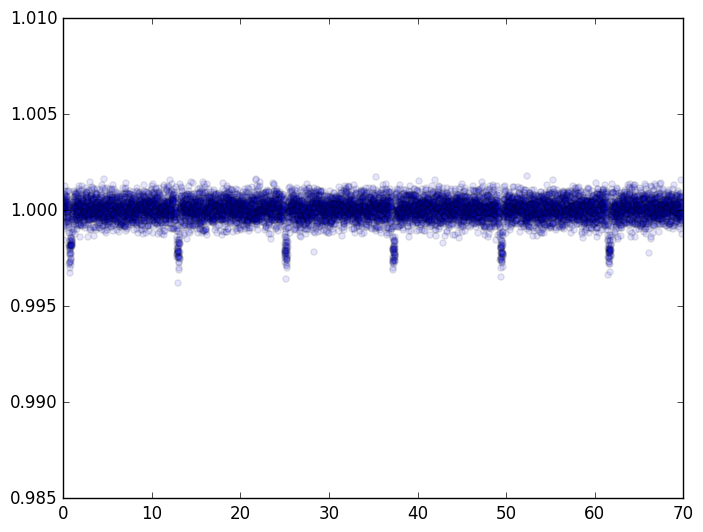

(0.0,69.992996)

In [97]:
scatter(data[:,1],data[:,2]/mean(data[:,2]),alpha=0.1)
xlim(data[1,1],data[end,1])

In [145]:
function period_to_semi(P::Float64,Ms::Float64,Mp::Float64)
    Pyear = P/365.0 # takes in period in days
    return (Pyear*Pyear*(Ms+Mp))^(1./3.)
end

period_to_semi (generic function with 1 method)

In [215]:
period = 5.0 #days
Ms = 1.0 # Msol
Mp = 3.003467e-6*20 # mass of earth in solar masses 
Rs = 1.0 # solar radii
Rp = 0.009*5.0 # Earth radius in solar radii
ecc = 0.5
varpi = 0.0 # rads
semi = period_to_semi(period,Ms,Mp)/0.004649 
inc = 88.0*(pi/180.0) # rads

1.53588974175501

In [216]:
time_hires = collect(linspace(0,15,10000))
rel_flux = zeros(length(time_hires))
distance = zeros(length(time_hires))
for i=1:length(time_hires)
    distance[i] = center_separation(time_hires[i],time_hires[1],period,semi,inc,ecc,varpi)
    rel_flux[i] = relative_flux(distance[i],Rp,Rs)
end

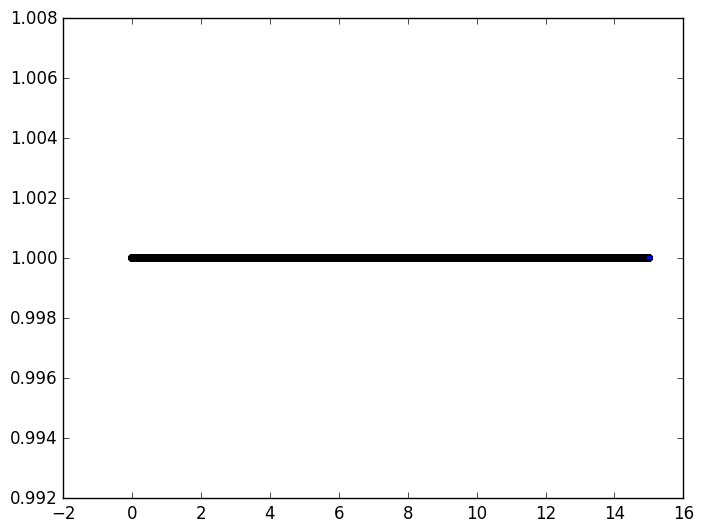

PyObject <matplotlib.collections.PathCollection object at 0x328639690>

In [217]:
scatter(time_hires,rel_flux)
#xlim(1.1,1.5)
#ylim(0.995,1.005)